dict_keys(['age', 'first_name', 'gender', 'id', 'last_name'])
 
There are  5191  Unique customers in the data set
 
There are this many unique categories of products: 8
 
The most popular payment method is Debit Card .
It was used  44447  many times
 
These are the most popular categories: 
Clothing
Cosmetics
Food & Beverage
 
The number of sales to customers over 45 are 3858
 
age_range        10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89
category                                                               
Books              228   1107   1262   1293   1152   1171    910    396
Clothing          1700   7350   8503   8631   7741   7862   6123   3411
Cosmetics          730   3112   4077   3773   3267   3486   2436   1436
Food & Beverage    689   3057   3691   3820   3183   3374   2457   1333
Shoes              473   2212   2613   2664   2240   2162   1803    969
Souvenir           274    962   1190   1252   1080   1080    759    458
Technology         274   1073   1311   1320

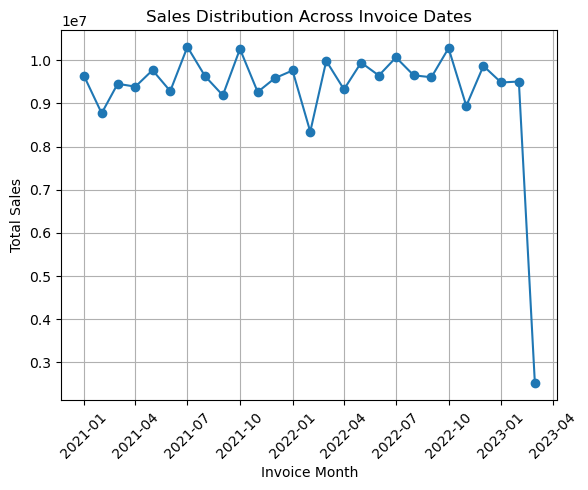

In [8]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import json

with open("dim_customer.json", "r") as f:
    Customer_data = json.load(f)
    
customerkeys = Customer_data.keys()
print(customerkeys)
#Get unique customer amt
print(" ")
customerset = set()
i = 0

for customer in Customer_data["first_name"]:
    
    fullname = Customer_data["first_name"][str(i)], " ", Customer_data["last_name"][str(i)]
    customerset.add(fullname)
    i+=1

print("There are ",  i," Unique customers in the data set")

#Get Unique category amount
print(" ")
Invoice_data = pd.read_csv("fct_invoice.csv")
uniquecats = Invoice_data["category"].nunique()
print("There are this many unique categories of products:", uniquecats)

#Get most poppular payment method and amt of times used
print(" ")
mostpopular = Invoice_data["payment_method"].max()
amtpopular = Invoice_data["payment_method"].value_counts().iloc[0]
print("The most popular payment method is", mostpopular,".\nIt was used ", amtpopular ," many times")

#Most popular categories by total sales
print(" ")
catquants = Invoice_data.groupby("category")["quantity"].sum()
catsorted = catquants.sort_values(ascending=False)
top3 = catsorted.head(3)
print("These are the most popular categories: ")
for cat in top3.index:
    print(cat)

#Customers over 45
print(" ")
i = 0
j = 0

for age in Customer_data["age"]:

    if str(Customer_data["age"][str(i)]) > "45":
        j+=1
    i+=1

print("The number of sales to customers over 45 are", j)
#Data distribution
print(" ")

Invoice_data["invoice_date"] = pd.to_datetime(Invoice_data["invoice_date"],dayfirst= True)
Invoice_data["total_sales"] = Invoice_data["quantity"] * Invoice_data["price"]
monthly_sales = Invoice_data.groupby(Invoice_data["invoice_date"].dt.to_period("M"))["total_sales"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Sales Distribution Across Invoice Dates")
plt.xlabel("Invoice Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
#plt.show()

#HARD
def idtoage (id):
    try: 
        age = Customer_data["age"][str(id)] 
        if age > 0 and age < 10:
            return "0-9"
        elif age >10 and age < 20:
            return "10-19"
        elif age >20 and age < 29:
            return "20-29"
        elif age >30 and age < 39:
            return "30-39"
        elif age >40 and age < 49:
            return "40-49"
        elif age >50 and age < 59:
            return "50-59"
        elif age >60 and age < 69:
            return "60-69"
        elif age >70 and age < 79:
            return "70-79"
        elif age >80 and age < 89:
            return "80-89"     
        elif age >90 and age < 100:
            return "90-99"     
        elif age >100 :
            return "100+"     
        
    except:
        return None

Invoice_data["age_range"] = Invoice_data["customer_id"].apply(idtoage)
pivot_sales_cat_age = pd.pivot_table(Invoice_data, values="quantity", index="category", columns="age_range", aggfunc= "sum")
print(pivot_sales_cat_age)

